Data exploration on MovieLens 1M data set (https://grouplens.org/datasets/movielens/1m/) based on a exercise in chapter 14 of the "Python for Data Analysis" book by Wes McKinney 

In [1]:
!ls datasets/movielens

movies.dat  ratings.dat  README  users.dat


In [ ]:
import pandas as pd
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('datasets/movielens/users.dat',sep='::',header=None,names=unames)

In [ ]:
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat',sep='::', names=rnames)

In [ ]:
mnames = ['movie_id','title','genres']
movies = pd.read_table('datasets/movielens/movies.dat',sep='::',names=mnames)

In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data = pd.merge(pd.merge(ratings,users),movies)

In [9]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:
mean_ratings = data.pivot_table('rating',columns=['gender'],index='title')
mean_ratings_1 = data.pivot_table('rating',columns=['gender','age'],index='title')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [12]:
data.pivot_table('rating',index='title')[:5]

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [13]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [17]:
mean_ratings_1[:5]
mean_ratings_1[:5]['F'][18]

title
$1,000,000 Duck (1971)           5.000000
'Night Mother (1986)             4.500000
'Til There Was You (1997)        2.666667
'burbs, The (1989)               3.035714
...And Justice for All (1979)         NaN
Name: 18, dtype: float64

In [25]:
mean_ratings_for_plot = mean_ratings[:10]
print(mean_ratings_for_plot.size)
mean_ratings_for_plot.head()
#mean_ratings_for_plot.stack()
#mean_ratings_for_plot.head()

20


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


[]

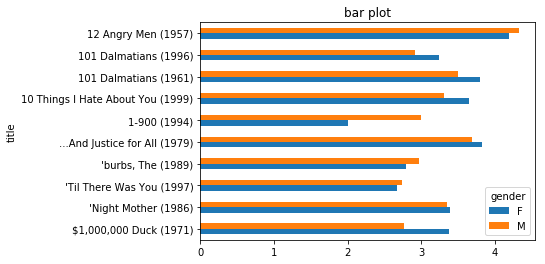

In [30]:
import matplotlib.pyplot as plt
ax = mean_ratings_for_plot[['F','M']].plot.barh()
ax.set_title("bar plot")
ax.plot()

In [33]:
mean_ratings_for_plot_1 = mean_ratings_1[:10]
tmp = mean_ratings_for_plot_1[[('F',1),('M',1)]]
tmp.head()
#mean_ratings_for_plot_1.plot.barh()
#tmp.plot.barh()
#tmp_tab = mean_ratings_for_plot_1.stack().stack()
#tmp_tab.name = 'rating'
#tmp_tab1 = tmp_tab.reset_index()
#tmp_tab1



gender,F,M
age,1,1
title,,
"$1,000,000 Duck (1971)",NaN,NaN
'Night Mother (1986),3.0,1.0
'Til There Was You (1997),2.0,5.0
"'burbs, The (1989)",NaN,4.5
...And Justice for All (1979),NaN,3.0


In [28]:
mean_stack = mean_ratings_for_plot.stack()
mean_stack.name = 'Rating'
temp = mean_stack.reset_index()
temp
#mean_stack
#temp
#mean_stack.name = 'rating'
#mean_stack.reset_index()
#mean_unstack = mean_stack.unstack()
#mean_unstack.reset_index()

,title,gender,Rating
0,"$1,000,000 Duck (1971)",F,3.375000
1,"$1,000,000 Duck (1971)",M,2.761905
2,'Night Mother (1986),F,3.388889
3,'Night Mother (1986),M,3.352941
4,'Til There Was You (1997),F,2.675676
5,'Til There Was You (1997),M,2.733333
6,"'burbs, The (1989)",F,2.793478
7,"'burbs, The (1989)",M,2.962085
8,...And Justice for All (1979),F,3.828571
9,...And Justice for All (1979),M,3.689024


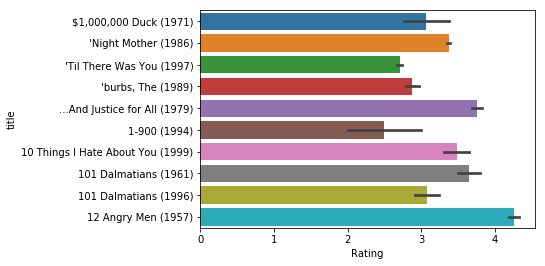

In [19]:
import seaborn as sns
#sns.barplot(x='Rating',y='title',hue='gender',data=temp)
sns.barplot(x='Rating',y='title',data=temp)

In [20]:
tmp_tab1.head()
#sns.barplot(x='rating',y='title',hue=['gender','age'],data=tmp_tab1) #this does not work

,title,age,gender,rating
0,"$1,000,000 Duck (1971)",18,F,5.000000
1,"$1,000,000 Duck (1971)",18,M,2.600000
2,"$1,000,000 Duck (1971)",25,F,3.333333
3,"$1,000,000 Duck (1971)",25,M,3.000000
4,"$1,000,000 Duck (1971)",35,F,3.222222


In [21]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [22]:
ratings_by_title = data.groupby('title')
ratings_by_title.indices

{'Pushing Tin (1999)': array([564178, 564179, 564180, 564181, 564182, 564183, 564184, 564185,
        564186, 564187, 564188, 564189, 564190, 564191, 564192, 564193,
        564194, 564195, 564196, 564197, 564198, 564199, 564200, 564201,
        564202, 564203, 564204, 564205, 564206, 564207, 564208, 564209,
        564210, 564211, 564212, 564213, 564214, 564215, 564216, 564217,
        564218, 564219, 564220, 564221, 564222, 564223, 564224, 564225,
        564226, 564227, 564228, 564229, 564230, 564231, 564232, 564233,
        564234, 564235, 564236, 564237, 564238, 564239, 564240, 564241,
        564242, 564243, 564244, 564245, 564246, 564247, 564248, 564249,
        564250, 564251, 564252, 564253, 564254, 564255, 564256, 564257,
        564258, 564259, 564260, 564261, 564262, 564263, 564264, 564265,
        564266, 564267, 564268, 564269, 564270, 564271, 564272, 564273,
        564274, 564275, 564276, 564277, 564278, 564279, 564280, 564281,
        564282, 564283, 564284, 564285, 56

In [23]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [24]:
ratings_by_title.size()

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [25]:
ratings_by_title.size() > 250

title
$1,000,000 Duck (1971)                            False
'Night Mother (1986)                              False
'Til There Was You (1997)                         False
'burbs, The (1989)                                 True
...And Justice for All (1979)                     False
1-900 (1994)                                      False
10 Things I Hate About You (1999)                  True
101 Dalmatians (1961)                              True
101 Dalmatians (1996)                              True
12 Angry Men (1957)                                True
13th Warrior, The (1999)                           True
187 (1997)                                        False
2 Days in the Valley (1996)                        True
20 Dates (1998)                                   False
20,000 Leagues Under the Sea (1954)                True
200 Cigarettes (1999)                             False
2001: A Space Odyssey (1968)                       True
2010 (1984)                               

In [26]:
b = ratings_by_title['rating'].size() > 250
b.index

Index(['$1,000,000 Duck (1971)', ''Night Mother (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       '...And Justice for All (1979)', '1-900 (1994)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       ...
       'Young Poisoner's Handbook, The (1995)', 'Young Sherlock Holmes (1985)',
       'Young and Innocent (1937)', 'Your Friends and Neighbors (1998)',
       'Zachariah (1971)', 'Zed & Two Noughts, A (1985)', 'Zero Effect (1998)',
       'Zero Kelvin (Kj�rlighetens kj�tere) (1995)', 'Zeus and Roxanne (1997)',
       'eXistenZ (1999)'],
      dtype='object', name='title', length=3706)

In [27]:
type(mean_ratings)

pandas.core.frame.DataFrame

In [28]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [34]:
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                  'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)}
                   )

In [35]:
df

,data1,data2,key1,key2
0,0.741343,-1.666303,a,one
1,-0.031034,0.735621,a,two
2,0.356986,0.323623,b,one
3,0.643951,1.780744,b,two
4,-2.252387,-0.644844,a,one


In [36]:
df[df['key1']=='a'].sum()

data1     -1.54208
data2     -1.57553
key1           aaa
key2     onetwoone
dtype: object

In [32]:
df.sum()

data1            2.27658
data2           0.298295
key1               aabba
key2     onetwoonetwoone
dtype: object

In [34]:
ratings_by_title.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
1726,23,661,2,978460739,M,35,0,90049,James and the Giant Peach (1996),Animation|Children's|Musical
1727,49,661,3,977972750,M,18,12,77084,James and the Giant Peach (1996),Animation|Children's|Musical
1728,53,661,5,977979726,M,25,0,96931,James and the Giant Peach (1996),Animation|Children's|Musical
1729,57,661,4,977935511,M,18,19,30350,James and the Giant Peach (1996),Animation|Children's|Musical


In [44]:
ratings_by_title['title'].size()

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [181]:
#tmp = ratings_by_title['title'].size() >= 250
#type(tmp)
tmp1 = (tmp == True)
#tmp.index[tmp == True]
#tmp[tmp==True]
type(tmp1)
tmp[tmp1]
tmp[-10:3697]

title
Young Poisoner's Handbook, The (1995)    False
Name: title, dtype: bool

In [147]:
active_titles = tmp.index[tmp==True]
tmp
#tmp[tmp==True].index

title
$1,000,000 Duck (1971)                            False
'Night Mother (1986)                              False
'Til There Was You (1997)                         False
'burbs, The (1989)                                 True
...And Justice for All (1979)                     False
1-900 (1994)                                      False
10 Things I Hate About You (1999)                  True
101 Dalmatians (1961)                              True
101 Dalmatians (1996)                              True
12 Angry Men (1957)                                True
13th Warrior, The (1999)                           True
187 (1997)                                        False
2 Days in the Valley (1996)                        True
20 Dates (1998)                                   False
20,000 Leagues Under the Sea (1954)                True
200 Cigarettes (1999)                             False
2001: A Space Odyssey (1968)                       True
2010 (1984)                               

In [93]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [55]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [94]:
mean_ratings.loc[active_titles]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [58]:
type(mean_ratings)

pandas.core.frame.DataFrame

In [95]:
mean_ratings_1 = mean_ratings.loc[active_titles]

In [64]:
mean_ratings_1.columns

Index(['F', 'M'], dtype='object', name='gender')

In [97]:
mean_ratings_1.sort_values('F',axis=0,ascending=False)[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [68]:
active_titles[:10]

Index(['$1,000,000 Duck (1971)', ''Night Mother (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       '...And Justice for All (1979)', '1-900 (1994)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)'],
      dtype='object', name='title')

In [72]:
ratings_by_title_size = ratings_by_title.size()

In [73]:
active_titles = ratings_by_title_size.index[ratings_by_title_size>=250]

In [74]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [75]:
mean_ratings = mean_ratings.loc[active_titles]

In [108]:
top_female_rating = mean_ratings.sort_values('F',ascending=False)
top_female_rating[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


(0, 6)

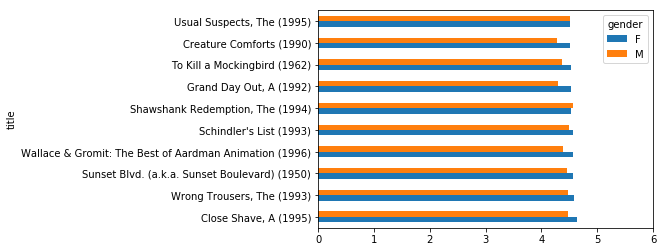

In [118]:
a = top_female_rating[:10].plot.barh(y=['F','M'])
a.set_xlim(0, 6)

In [79]:
ratings_by_title_size > 250

title
$1,000,000 Duck (1971)                            False
'Night Mother (1986)                              False
'Til There Was You (1997)                         False
'burbs, The (1989)                                 True
...And Justice for All (1979)                     False
1-900 (1994)                                      False
10 Things I Hate About You (1999)                  True
101 Dalmatians (1961)                              True
101 Dalmatians (1996)                              True
12 Angry Men (1957)                                True
13th Warrior, The (1999)                           True
187 (1997)                                        False
2 Days in the Valley (1996)                        True
20 Dates (1998)                                   False
20,000 Leagues Under the Sea (1954)                True
200 Cigarettes (1999)                             False
2001: A Space Odyssey (1968)                       True
2010 (1984)                               

In [121]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [120]:
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,-0.168607
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
101 Dalmatians (1996),3.240000,2.911215,0.328785
12 Angry Men (1957),4.184397,4.328421,-0.144024
"13th Warrior, The (1999)",3.112000,3.168000,-0.056000
2 Days in the Valley (1996),3.488889,3.244813,0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,-0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,-0.304156


In [122]:
mean_ratings_diff_sorted = mean_ratings.sort_values(by='diff')

In [123]:
mean_ratings_diff_sorted[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [140]:
mean_ratings_diff_sorted[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [137]:
a['test'] = 0

/home/duong/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
mean_ratings_diff_sorted

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561
